In [1]:
import numpy as np
from keras.models import load_model
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import re


Using TensorFlow backend.


In [2]:
try:
    with open('text.txt', 'r', encoding='utf-8') as file:
        text = file.read()
except:
    print('no file found, take default text')
    text = '0213asfgafug4235u25uk'

digits = re.findall('[0-9]', text)
dig_counter = dict()
for i in range(10):
    dig_counter[i] = digits.count(str(i))

print(dig_counter)

dig_counter_sorted = sorted(dig_counter.items(), key=lambda kv: kv[1], reverse=True)
print(dig_counter_sorted)
most_popular_int = dig_counter_sorted[0][0]
print(most_popular_int)

{0: 26, 1: 37, 2: 25, 3: 12, 4: 5, 5: 4, 6: 17, 7: 6, 8: 1, 9: 3}
[(1, 37), (0, 26), (2, 25), (6, 17), (3, 12), (7, 6), (4, 5), (5, 4), (9, 3), (8, 1)]
1


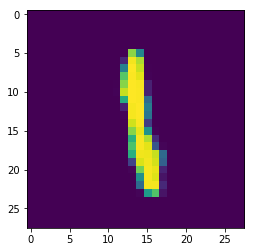

In [3]:
generator = load_model('generator.h5')
noise = np.random.normal(0, 1, (1, 10))
image = generator.predict(x=[noise, to_categorical(np.array([most_popular_int], dtype=np.int32), num_classes=10)])

plt.imshow(image[0,:,:,0])